# Evaluación de modelos

En esta sesión vamos a hablar de la evaluación de modelos y de diferentes métodos empleados para valorar la calidad de un algoritmo de ML.

## Métricas de rendimiento en clasificación

Existen múltiples métricas para la evaluación del rendimiento de modelos de clasificación.
La mayoría de las métricas de rendimiento en problemas de clasificación se basan en el analisis de los resultados de la **matriz de confusión**: la matriz que muestra el numero de predicciones correctas e incorrectas realizadas por el modelo.

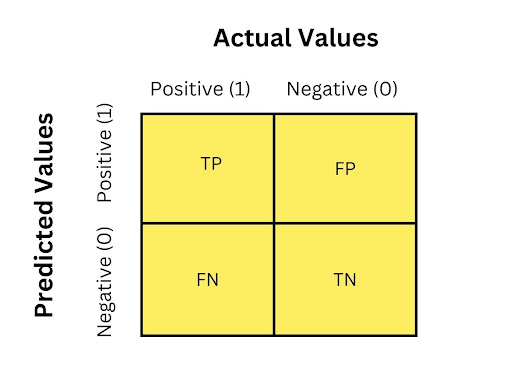

Así, la primera columna muestra el numero de aciertos al clasificar instancias positivas como positivas (TP) y el numero de errores resultado de clasificar como negativas instancias que realmente eran positivas (**errores de tipo II**). En la segunda columna encontraremos, a su vez, el numero de errores cometidos al clasificar como positivas observaciones que eran negativas (**errores de tipo I**) y el numero de aciertos al clasificar como negativas instancias originalmente negativas.

A partir de esta matriz podemos definir algunas de las métricas mas empleadas en problemas de clasificación. 

* **Accuracy**: mide el porcentaje de instancias correctamente clasificadas. 
$$ accuracy = \frac{TP + TN}{TP+TN+FP+FN} $$

* **Precision**: mide el porcentaje de clasificaciones positivas correctas. Intuitivamente representa la habilidad del modelo para no cometer errores de tipo I.
$$ precision = \frac{TP}{TP+FP} $$

* **Recall**: mide el porcentaje de observaciones positivas correctamente clasificadas. Intuitivamente nos permite evaluar la habilidad del modelo para clasificar correctamente todas las observaciones positivas.
$$ recall = \frac{TP}{TP+FN} $$

* **F1 score**: unifica los resultados de *recall* y *precision* en una única métrica aplicando una media harmónica.
$$ F1 = 2*\frac{precision*recall}{precision+recall} = \frac{2 * TP}{2*TP+FP+FN}$$

Todas estas metricas toman valores en el intervalo [0, 1], siendo 0 el peor valor y 1 el mejor.

En python podemos emplear la libreria `scikit-learn` para calcular fácilmente estas métricas. A continuación emplearemos el dataset de cáncer de mama para demostrar como calcular estas métricas.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

cancer = datasets.load_breast_cancer(as_frame=True)

X = cancer.data
y = cancer.target

X.info()

y.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

La variable predictora `y` contiene un `1` cuando el cáncer de mama es benigno y un `0` cuando es maligno. Hay un total de 212 registros con la etiqueta de maligno y 357 registros con la etiqueta de benigno. Procedamos a entrenar un modelo de clasificación sobre los datos, en este caso una maquina de soporte vectorial. Para ello antes realizaremos una estandarización de los datos.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

sc = StandardScaler()
X_std = sc.fit_transform(X)

svc = SVC(kernel='linear', C=10.0, random_state=42)
svc.fit(X_std, y)

SVC(C=10.0, kernel='linear', random_state=42)

Realicemos ahora las predicciones y calculemos la matriz de confusión: 

In [3]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(X)
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)

print('La matriz de confusión obtenida por el SVM: \n{}'.format(conf_matrix))

La matriz de confusión obtenida por el SVM: 
[[212   0]
 [357   0]]


/Users/luisi/Documents/Master-Big-Data/Minería de datos/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Una vez tenemos los valores reales de la clase y su prediccion, podemos obtener los valores de *accuracy*, precisión, *recall* y *F1* del modelo. Para ello, podemos aplicar manualmente las ecuaciones vistas previamente, o podemos hacer uso de las funciones proporcionadas por `scikit-learn`:

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'La accuracy del modelo es {accuracy:.3f}')
print(f'La precisión del modelo es {precision:.3f}')
print(f'El recall del modelo es {recall:.3f}')
print(f'El F1-score del modelo es {f1:.3f}')

La accuracy del modelo es 0.373
La precisión del modelo es 0.000
El recall del modelo es 0.000
El F1-score del modelo es 0.000


/Users/luisi/Documents/Master-Big-Data/Minería de datos/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Además de estas métricas, podemos emplear una **curva ROC** para visualizar el rendimiento del modelo a medida que variamos el umbral de clasificación. Esta curva representa el ratio de TP frente al ratio de FP. Cuanto más arriba a la izquierda esté la gráfica mejor será el modelo.

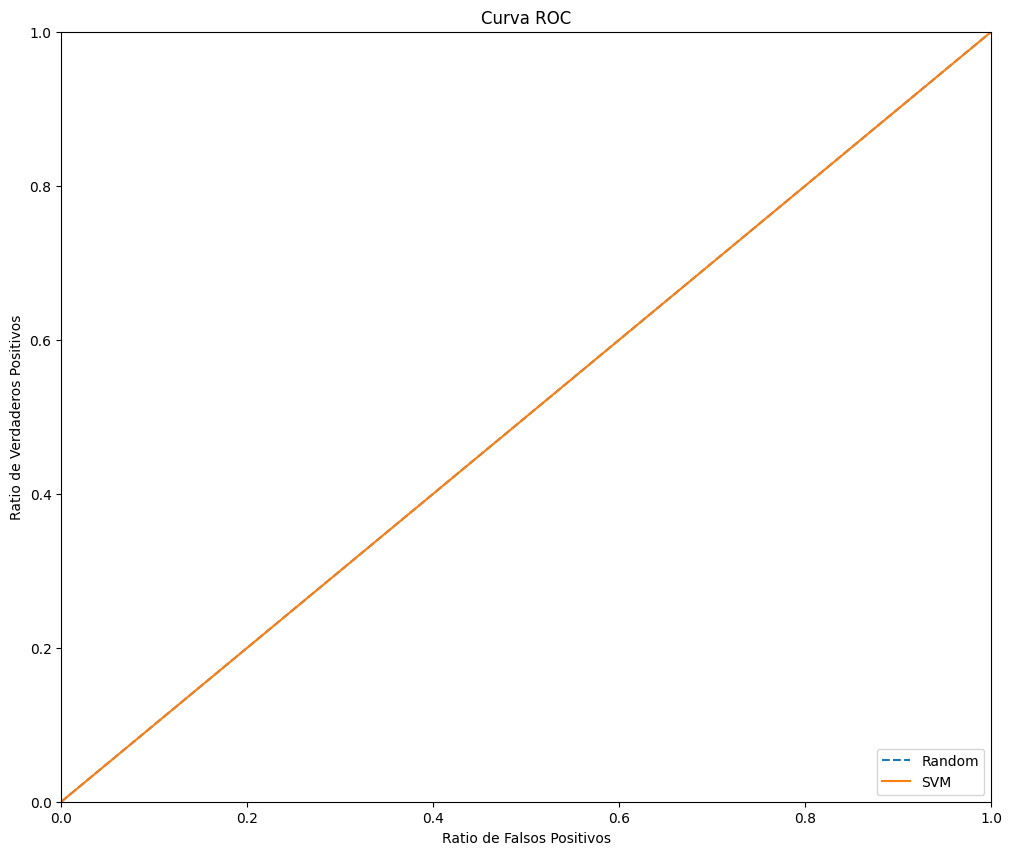

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_svm, tpr_svm, thresholds = roc_curve(y, y_pred, pos_label=1)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

ax.plot([0, 1], [0, 1], ls="--", label="Random")
ax.plot(fpr_svm, tpr_svm, label = "SVM")

ax.set_xlabel('Ratio de Falsos Positivos')
ax.set_ylabel('Ratio de Verdaderos Positivos')
ax.set_title('Curva ROC')

ax.legend(loc="lower right")
plt.show()

La interpretación visual de la curva ROC puede resumirse tambien numéricamente empleando el concepto de **area bajo la curva (AUC)**. Cuanto mayor sea el valor del AUC, mejor será el modelo. Así, cuando un modelo tenga un $ AUC = 1 $, diremos que el modelo es perfecto, mientras que un modelo con $ AUC = 0.5 $ tendrá el mismo rendimiento que un modelo aleatorio.

In [6]:
from sklearn.metrics import auc

auc_svm = auc(fpr_svm, tpr_svm)

print(f"El valor de AUC para el modelo SVM es: {auc_svm:.3f}")

El valor de AUC para el modelo SVM es: 0.500


<div class="alert alert-info">

**Ejercicio**

Empleando el dataset de cancer de mama, entrena los siguientes modelos: `RandomForest`, `GradientBoosting`, `ExtraTrees`, `KNN`, `DecisionTree` y `SVM`. 

Para cada uno de ellos, obtén las métricas anteriores y representalas gráficamente. 
Representa tambien todas las curvas ROC.

¿Cuál es el mejor modelo?

</div> 


Métricas:
                  Accuracy  Precision  Recall  F1 Score
Modelo                                                 
RandomForest         1.000      1.000   1.000     1.000
GradientBoosting     1.000      1.000   1.000     1.000
ExtraTrees           1.000      1.000   1.000     1.000
KNN                  0.981      0.973   0.997     0.985
DecisionTree         1.000      1.000   1.000     1.000
SVM                  0.988      0.981   1.000     0.990


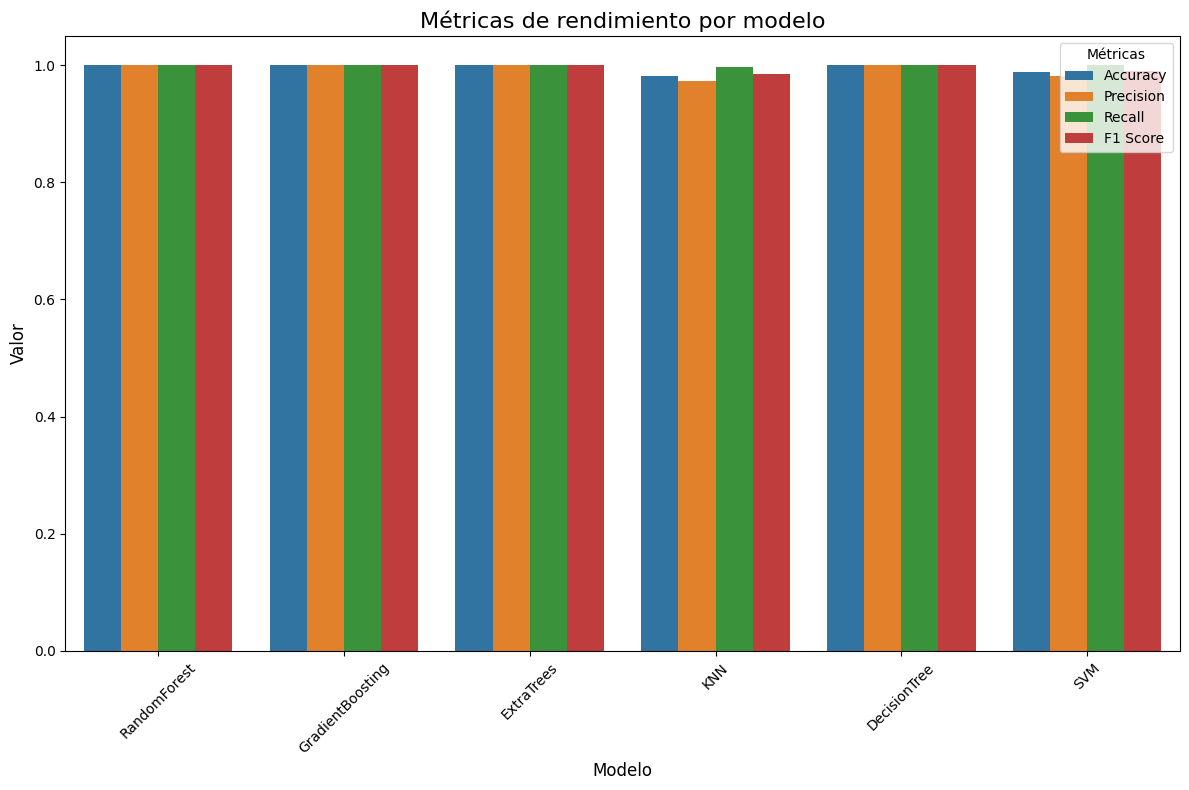

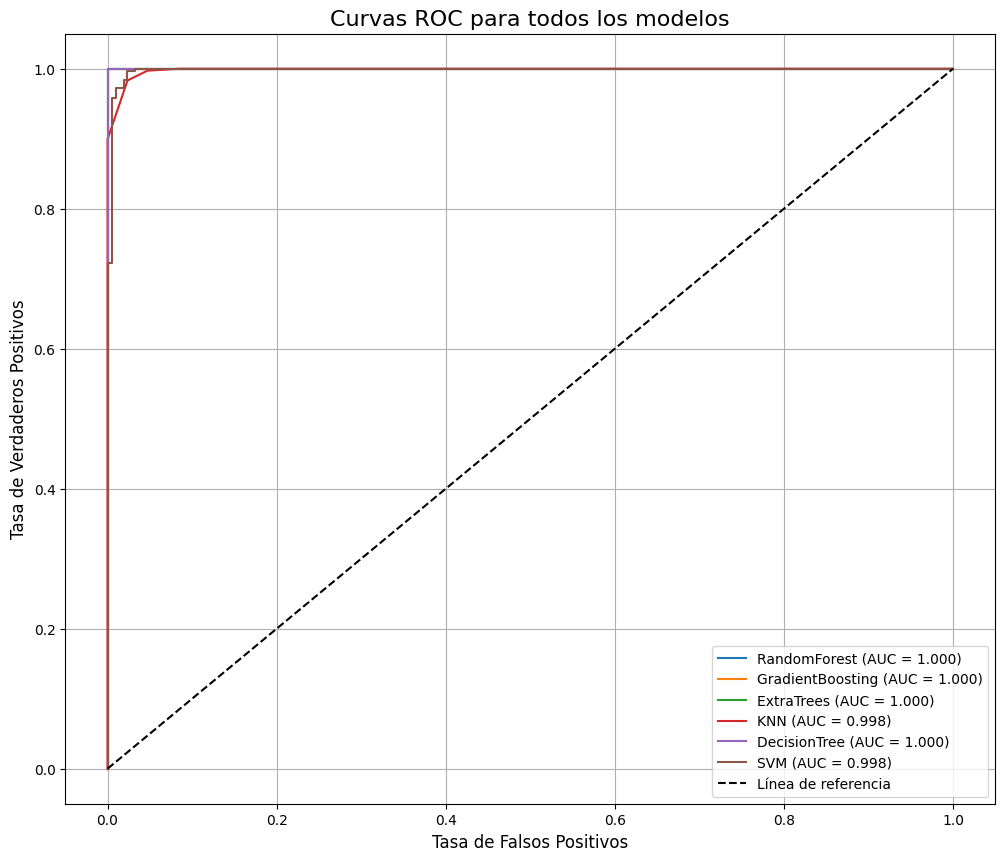

('RandomForest',
 {'fpr': array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.01415094, 0.02358491, 0.04245283, 0.05188679,
         0.05660377, 0.07075472, 0.0754717 , 0.08962264, 0.11320755,
         0.13207547, 0.13679245, 0.1509434 , 0.22641509, 0.26415094,
         0.29716981, 0.35849057, 0.46698113, 1.        ]),
  'tpr': array([0.        , 0.61064426, 0.74509804, 0.81792717, 0.84033613,
         0.8487395 , 0.8767507 , 0.87955182, 0.89355742, 0.91596639,
         0.92717087, 0.92997199, 0.93557423, 0.93837535, 0.95238095,
         0.96078431, 0.9719888 , 0.97478992, 0.98319328, 0.99439776,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.  

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import seaborn as sns

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


results = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
roc_data = {}

for name, model in models.items():
    model.fit(X_std, y)
    
    y_pred = model.predict(X_std)
    y_proba = model.predict_proba(X_std)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    results.loc[len(results)] = [name, accuracy, precision, recall, f1]
    
    fpr, tpr, _ = roc_curve(y, y_proba)
    auc = roc_auc_score(y, y_proba)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc}

print("\nMétricas:")
print(results.set_index('Modelo').round(3))


fig, ax = plt.subplots(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_long = pd.melt(results, id_vars=['Modelo'], value_vars=metrics, var_name='Métrica', value_name='Score')

sns.barplot(data=results_long, x='Modelo', y='Score', hue='Métrica', ax=ax)
plt.title('Métricas de rendimiento por modelo', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))

for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Línea de referencia')
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC para todos los modelos', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

best_model = max(roc_data.items(), key=lambda x: x[1]['auc'])
best_model

## Metricas de rendimiento en regresión

En problemas de regresión, al contrario que en los de clasificación, no podemos definir una matriz de confusión a partir de la cual calcular las métricas anteriores. Por el contrario, en estos casos se suelen emplear métricas que indican lo cerca o lejos que los valores predichos por un modelo están de los valores reales.

Algunas de las métricas más comunes empleadas a la hora de evaluar modelos de regresión son:

* **Error absoluto medio (MAE)**: mide la "distancia" absoluta entre los valores reales y los predichos por el modelo. Se expresa en la misma unidad que el valor que se está prediciendo. Este error no está acotado por arriba, por lo que toma valores en el rango $[0, \inf)$. Cuanto más cercano a 0 sea el valor del MAE, mejores serán las predicciones del modelo.

$$ MAE = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples} - 1} |{y}_i - \hat{y}_i| $$

* **Error cuadrático medio (MSE)**: mide la "distancia" entre los valores reales y los predichos por el modelo, pero empleando los cuadrados para evitar que estas se anulen entre si. Al usar los cuadrados, da mayor importancia a los errores grandes. Al igual que el MAE, no está acotado por arriba, por lo que toma valores en el intervalo $[0, \inf)$, siendo mejor el modelo cuanto mas cercano a 0 sea el valor de la metrica.

$$ MSE = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples} - 1} ({y}_i - \hat{y}_i) ^2 $$

* **Coeficiente de determinación $R^2$**: mide la proporcion de la varianza de $y$ explicada por los terminos independientes del modelo. Sus valores estan en el rango $(-\inf, 1]$, indicando 1 un ajuste perfecto, 0 que el modelo no explica ninguna variabilidad y valores negativos que el modelo se ajusta peor que un modelo que siempre prediga la media. 

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} ({y}_i - \hat{y}_i) ^2}{\sum_{i=1}^{n} ({y}_i - \bar{y}) ^2} $$

A continuación emplearemos el dataset de diabetes para demostrar como calcular estas métricas.

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)

X = diabetes.data
y = diabetes.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Procedamos a entrenar un modelo de regresion sobre los datos, nuevamente una maquina de soporte vectorial. Previamente estandarizaremos los datos.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc = StandardScaler()
X_std = sc.fit_transform(X)

svr = SVR(kernel="linear", C=10.0)
svr.fit(X, y)

SVR(C=10.0, kernel='linear')

Realicemos ahora las predicciones y calculemos las métricas: 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = svr.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'El MAE del modelo es {mae:.3f}')
print(f'El MSE del modelo es {mse:.3f}')
print(f'El R2 del modelo es {r2:.3f}')

El MAE del modelo es 57.840
El MSE del modelo es 4806.076
El R2 del modelo es 0.190


<div class="alert alert-info">

**Ejercicio**

Empleando el dataset de diabetes, entrena los siguientes modelos: `RandomForest`, `GradientBoosting`, `ExtraTrees`, `KNN`, `DecisionTree` y `SVM con kernel rbf`. 

Para cada uno de ellos, obtén las métricas anteriores y representalas gráficamente. 

¿Cuál es el mejor modelo?

</div> 


Métricas de rendimiento:
                     MAE       MSE     R2
Modelo                                   
RandomForest      17.666   476.754  0.920
GradientBoosting  27.841  1191.674  0.799
ExtraTrees         0.000     0.000  1.000
KNN               37.587  2342.556  0.605
DecisionTree       0.000     0.000  1.000
SVM (rbf)         56.895  4701.345  0.207


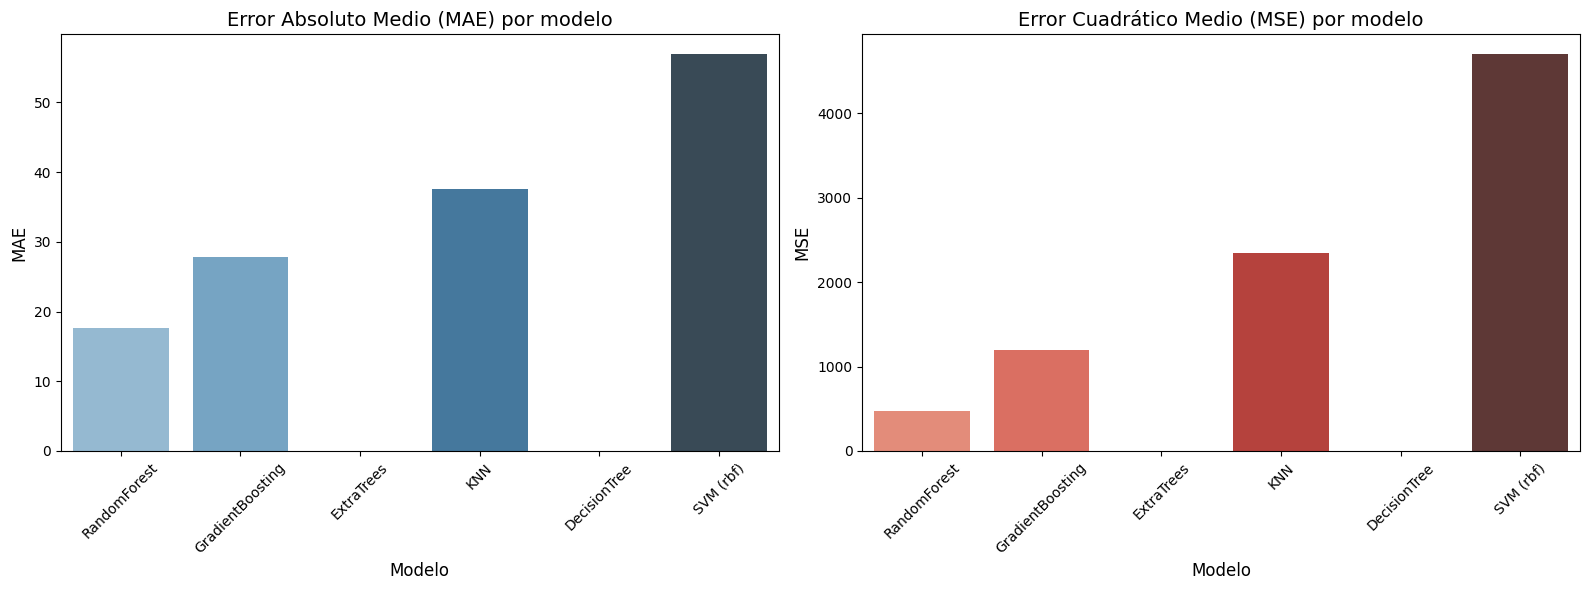

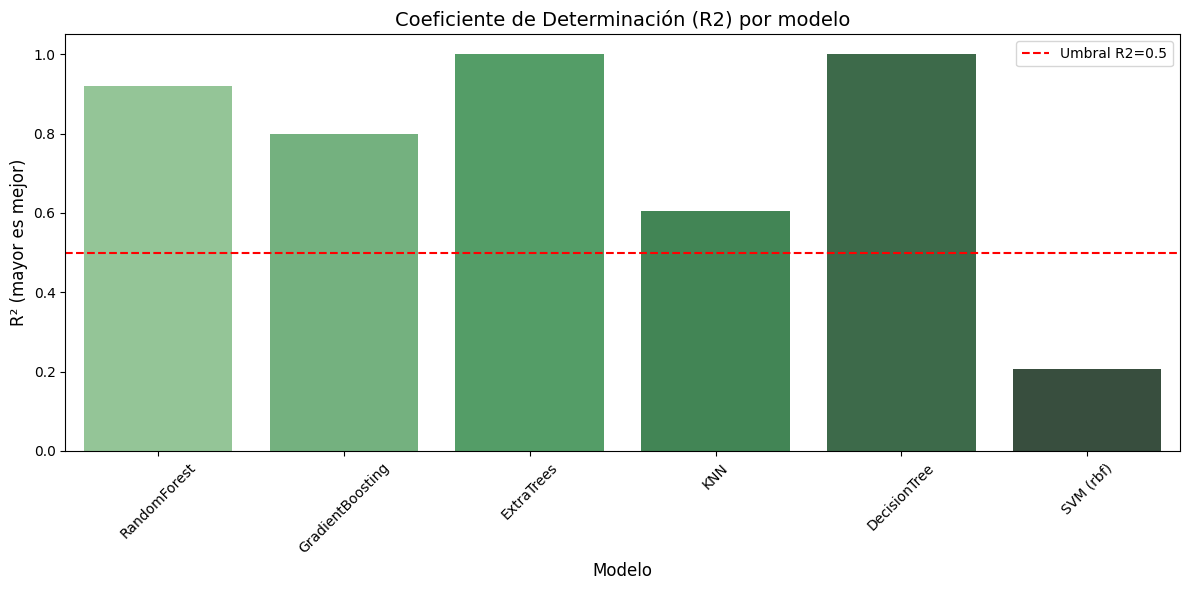


Mejor modelo según MAE: ExtraTrees
Mejor modelo según MSE: ExtraTrees
Mejor modelo según R2: ExtraTrees

Clasificación general de modelos:
             Modelo     Score
2        ExtraTrees  0.000000
4      DecisionTree  0.000000
0      RandomForest  0.171108
1  GradientBoosting  0.332096
3               KNN  0.552395
5         SVM (rbf)  1.000000

El mejor modelo general es: ExtraTrees


In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'SVM (rbf)': SVR(kernel='rbf')
}

results = pd.DataFrame(columns=['Modelo', 'MAE', 'MSE', 'R2'])

for name, model in models.items():
    model.fit(X_std, y)
    y_pred = model.predict(X_std)
    
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.loc[len(results)] = [name, mae, mse, r2]


print("\nMétricas de rendimiento:")
print(results.set_index('Modelo').round(3))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE
sns.barplot(x='Modelo', y='MAE', data=results, ax=axes[0], hue='Modelo', palette='Blues_d', legend=False)
axes[0].set_title('Error Absoluto Medio (MAE) por modelo', fontsize=14)
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].set_xlabel('Modelo', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# MSE
sns.barplot(x='Modelo', y='MSE', data=results, ax=axes[1], hue='Modelo', palette='Reds_d', legend=False)
axes[1].set_title('Error Cuadrático Medio (MSE) por modelo', fontsize=14)
axes[1].set_ylabel('MSE', fontsize=12)
axes[1].set_xlabel('Modelo', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='R2', data=results, hue='Modelo', palette='Greens_d', legend=False)
plt.title('Coeficiente de Determinación (R2) por modelo', fontsize=14)
plt.ylabel('R² (mayor es mejor)', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.tick_params(axis='x', rotation=45)
plt.axhline(y=0.5, color='red', linestyle='--', label='Umbral R2=0.5')
plt.legend()
plt.tight_layout()
plt.show()


best_mae = results.loc[results['MAE'].idxmin()]['Modelo']
best_mse = results.loc[results['MSE'].idxmin()]['Modelo']
best_r2 = results.loc[results['R2'].idxmax()]['Modelo']

print(f"\nMejor modelo según MAE: {best_mae}")
print(f"Mejor modelo según MSE: {best_mse}")
print(f"Mejor modelo según R2: {best_r2}")

# normalizamos las métricas para que todas tengan la misma escala (0-1)
norm_results = results.copy()
norm_results['MAE_norm'] = (results['MAE'] - results['MAE'].min()) / (results['MAE'].max() - results['MAE'].min())
norm_results['MSE_norm'] = (results['MSE'] - results['MSE'].min()) / (results['MSE'].max() - results['MSE'].min())
norm_results['R2_norm'] = 1 - (results['R2'] - results['R2'].min()) / (results['R2'].max() - results['R2'].min())


norm_results['Score'] = (norm_results['MAE_norm'] + norm_results['MSE_norm'] + norm_results['R2_norm']) / 3

print("\nClasificación general de modelos:")
print(norm_results[['Modelo', 'Score']].sort_values('Score'))

final_best = norm_results.loc[norm_results['Score'].idxmin()]['Modelo']
print(f"\nEl mejor modelo general es: {final_best}")

## Evaluación de modelos

Hasta ahora hemos visto como calcular métricas de rendimiento dado un modelo. No obstante, hemos estado "haciendo trampas": los datos que hemos empleado para entrenar y para evaluar el modelo han sido los mismos. Esto usualmente no es así. Por el contrario, existen distintos métodos para separar los datos en entrenamiento y evaluación, de forma que nuestra evaluación sea lo más justa posible. 

Todos los ejemplos a continuación los haremos empleando el dataset de IRIS, por lo que podemos cargarlo.

In [12]:
from sklearn import datasets

X, y = datasets.load_iris(as_frame=True, return_X_y=True)

print(X.shape, y.shape)

(150, 4) (150,)


### Hold-out
La forma más sencilla de particionar nuestros datos de entrenamiento y evaluación es a través de un *hold-out*. Este método divide nuestros datos en dos particiones: entrenamiento y evaluación, de forma que los datos que empleemos para entrenar nuestro modelo no se emplearán para evaluarlo, y viceversa.

El método de `scikit-learn` llamado `train_test_split` nos proporciona esta funcionalidad. Este método recibe como parámetros los conjuntos a particionar, además del parámetro `test_size` con el que establece el porcentaje de datos que formarán parte del conjunto de prueba.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


Con estos datos ya podemos entrenar nuestro modelo, empleando los datos de entrenamiento para entrenar y los de evaluación para evaluar. En este caso entrenamos una máquina de soporte vectorial (SVM):

In [14]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0).fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.98


Aun así, hay que ser cuidadosos cuando ajustamos diferentes hiperparámetros para los predictores, como el hiperparámetro C de la SVM, pues sigue existiendo un riesgo de sobreajuste al conjunto de evaluación. De este modo, el conocimiento sobre el conjunto de evaluación puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el rendimiento de la generalización. Para resolver este problema, se puede reservar otra parte del conjunto de datos, a la cual se llama "conjunto de validación": el entrenamiento se lleva a cabo en el conjunto de entrenamiento, después se realiza la evaluación en el conjunto de validación y, cuando el experimento parece tener éxito, se puede realizar la evaluación final en el conjunto de evaluación.

Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente el número de muestras que pueden utilizarse para el aprendizaje del modelo, y los resultados pueden depender de una elección aleatoria concreta para el par de conjuntos (entrenamiento, validación).

### Cross-validation

Una solución a este problema es un procedimiento denominado validación cruzada (CV). 
En este procedimiento el conjunto de evaluación sigue utilizándose para la evaluación final, pero el conjunto de validación deja de ser necesario. 
En el enfoque básico, denominado validación cruzada en $k$-pliegues ($k$-fold cross-validation), el conjunto de entrenamiento se divide en $k$ subconjuntos, y, para cada uno de los subconjuntos se sigue el siguiente procedimiento:

1) Se entrena un modelo utilizando $k-1$ pliegues como datos de entrenamiento.
2) El modelo resultante se valida con los datos del pliegue restante.
3) Se repite el procedimiento para cada pliegue.

La medida de rendimiento obtenida mediante la validación cruzada en $k$-pliegues es la media de los valores calculados en el bucle. Este método puede ser costoso desde el punto de vista computacional, pero no desperdicia demasiados datos (como ocurre cuando se fija un conjunto de validación arbitrario), lo que supone una gran ventaja en problemas en los que el número de muestras es pequeño.

La forma más sencilla de utilizar la validación cruzada es llamar a la función `cross_val_score` sobre el modelo y el conjunto de datos. Esta funcion recibe el modelo, los datos y el numero de pliegues, y nos devuelve una lista con el valor de la métrica para cada pliegue. Si queremos obtener el valor medio de las métricas basta con calcular la media de dicha lista.


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

# Tambien podemos especificar la métrica de evaluación que queremos usar empleando la funcion make_scorer
scores = cross_val_score(clf, X, y, scoring=make_scorer(precision_score, average="macro"), cv=5)

print(scores)

print(f"La CV obtuvo una accuracy media de {scores.mean():.3f} con desviación estándar igual a {scores.std():.3f}")

[0.96969697 1.         0.96969697 0.96969697 1.        ]
La CV obtuvo una accuracy media de 0.982 con desviación estándar igual a 0.015


<div class="alert alert-info">

**Ejercicio**

Calcula el recall, el accuracy, la precision y el F1 empleando el SVM de arriba y los mismos parámetros de validación cruzada.

</div> 

Accuracy medio: 0.980. Desviación estándar: 0.016
Precision medio: 0.982. Desviación estándar: 0.015
Recall medio: 0.980. Desviación estándar: 0.016
F1 Score medio: 0.980. Desviación estándar: 0.016


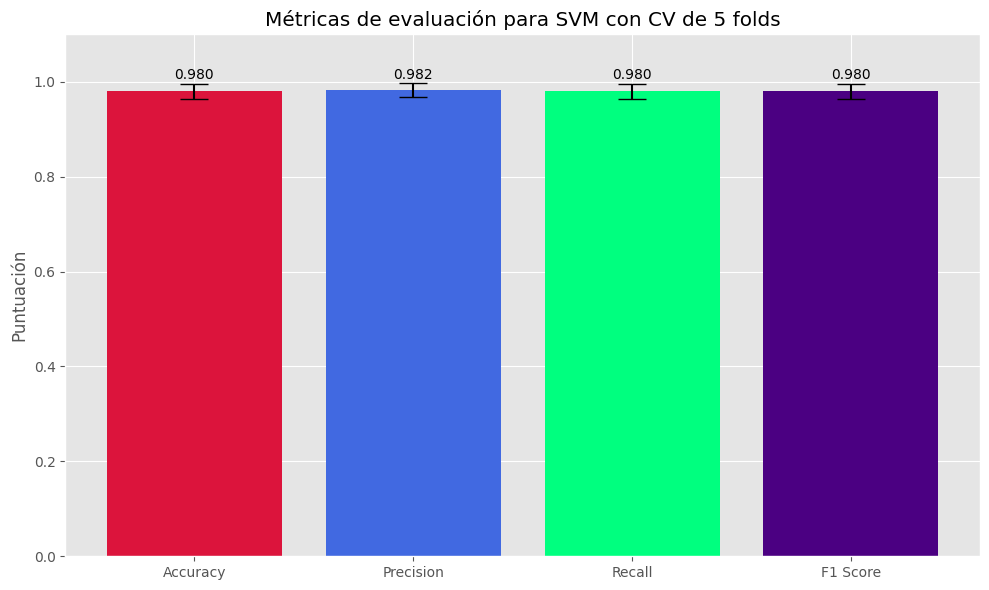

In [30]:
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score

clf = SVC(kernel='linear', C=1, random_state=42)

metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro'),
    'F1 Score': make_scorer(f1_score, average='macro')
}

# validación cruzada con 5 folds
results = {}
for metric_name, scorer in metrics.items():
    scores = cross_val_score(clf, X, y, scoring=scorer, cv=5)
    results[metric_name] = {
        'scores': scores,
        'mean': scores.mean(),
        'std': scores.std()
    }
    #print(f"{metric_name} scores: {scores}")
    print(f"{metric_name} medio: {scores.mean():.3f}. Desviación estándar: {scores.std():.3f}")


plt.figure(figsize=(10, 6))
metric_names = list(results.keys())
mean_scores = [results[m]['mean'] for m in metric_names]
std_scores = [results[m]['std'] for m in metric_names]

plt.bar(metric_names, mean_scores, yerr=std_scores, capsize=10, 
        color=['crimson', 'royalblue', 'springgreen', 'indigo'])

for i, v in enumerate(mean_scores):
    plt.text(i, v + std_scores[i] + 0.01, f'{v:.3f}', ha='center')

plt.ylim(0, 1.1) 
plt.ylabel('Puntuación')
plt.title('Métricas de evaluación para SVM con CV de 5 folds')
plt.tight_layout()
plt.show()

Una alternativa más completa a la función `cross_val_score` es la función `cross_validate`, que difiere de en dos aspectos principalmente:

1) Permite especificar múltiples métricas para la evaluación.
2) Devuelve un diccionario con metadatos como los tiempos de ajuste, tiempos de evaluación... así como la puntuación de la prueba.

Se puede conservar el estimador ajustado en cada conjunto de entrenamiento estableciendo el parámetro `return_estimator=True`.

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scores = cross_validate(
    clf, 
    X, 
    y, 
    scoring={
        "precision": make_scorer(precision_score, average="macro"), 
        "recall": make_scorer(recall_score, average="macro")
    }, 
    cv=5
)

print(scores)

{'fit_time': array([0.00318694, 0.00321603, 0.00252795, 0.00084114, 0.00062895]), 'score_time': array([0.00461531, 0.00696397, 0.01021791, 0.00210404, 0.00198293]), 'test_precision': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'test_recall': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])}


Si queremos ajustar aun más nuestra validación cruzada podemos personalizar la forma en la que `scikit-learn`hace las particiones de los datos. Para ello, tendremos que indicar una estrategia de partición con sus parámetros en lugar del numero de particiones al parámetro `cv`. Además, estas estrategias puende ser utiles cuando estamos empleando un clasificador no compatible con `scikit-learn` pero aun así queremos usar este para particionar los datos.

#### KFold

`KFold` divide el conjunto de muestras en grupos, llamados pliegues, de igual tamaño (si es posible). La función de predicción se aprende utilizando $k-1$ pliegues, y el pliegue que queda fuera se utiliza para la prueba.

A continuación mostramos un ejemplo de validación cruzada de 2 pliegues en un conjunto de datos con 4 muestras. Cada pliegue está constituido por dos matrices de índices: la primera con los elementos del conjunto de entrenamiento y la segunda con los del conjunto de prueba.

In [32]:
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
splits = kf.split(X)

for train, test in splits:
    print(f'{train} {test}')

[2 3] [0 1]
[0 1] [2 3]


#### Stratified KFold

`StratifiedKFold` es una variación de `KFold` que devuelve pliegues estratificados: cada conjunto mantiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo comparado con el conjunto completo.

A continuación se muestra un ejemplo de validación cruzada estratificada con 3 pliegues en un conjunto de datos con 50 muestras de dos clases desequilibradas. Se muestra el número de muestras de cada clase y se compara con KFold.

In [33]:
from sklearn.model_selection import StratifiedKFold

X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))

print('Stratified KFold:')
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')

print('KFold:')
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')

Stratified KFold:
train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
KFold:
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


#### RepeatedKFold y RepeatedStratifiedKFold

`RepeatedKFold` y `RepeatedStratifiedKFold` repiten el `KFold` y el `StratifiedKFold` $n$ veces, respectivamente. Se pueden utilizar cuando se requiere ejecutar la estrategia base $n$ veces produciendo diferentes divisiones en cada repetición.

Ejemplo de `KFold` repetido 2 veces:

In [34]:
from sklearn.model_selection import RepeatedKFold

X = np.array([[10, 11], [20, 21], [30, 31], [40, 41]])

rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=0)

for train, test in rkf.split(X):
    print(f'train: {train} test: {test}')

train: [0 1] test: [2 3]
train: [2 3] test: [0 1]
train: [1 3] test: [0 2]
train: [0 2] test: [1 3]


#### LeaveOneOut 

`LeaveOneOut` es una validación cruzada simple. Cada conjunto de aprendizaje se crea tomando todas las muestras excepto una, siendo el conjunto de prueba la muestra dejada fuera. Así, para $n$ muestras, tenemos $n$ conjuntos de entrenamiento diferentes y $n$ conjuntos de prueba diferentes.

In [35]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]

loo = LeaveOneOut()

for train, test in loo.split(X):
    print(f'train: {train} test: {test}')

train: [1 2 3] test: [0]
train: [0 2 3] test: [1]
train: [0 1 3] test: [2]
train: [0 1 2] test: [3]


#### GroupKFold, StratifiedGroupKFold y LeaveOneGroupOut

`GroupKFold` y `StratifiedGroupKFold` son variaciones de `KFold` y `StratifiedKFold` que garantizan que el mismo grupo no esté representado tanto en los conjuntos de prueba como en los de entrenamiento. 

Por ejemplo, si los datos se obtienen de diferentes sujetos con varias muestras por sujeto y si el modelo es lo suficientemente flexible como para aprender de características muy específicas de la persona, podría fallar a la hora de generalizar a nuevos sujetos. `GroupKFold` permite detectar este tipo de situaciones de sobreajuste.

Imagina que tienes tres sujetos, cada uno con un número asociado del 1 al 3:

In [36]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print(f'train: {train} test: {test}')

train: [0 1 2 3 4 5] test: [6 7 8 9]
train: [0 1 2 6 7 8 9] test: [3 4 5]
train: [3 4 5 6 7 8 9] test: [0 1 2]


Al aplicar el `GroupKFold` vemos que las observaciones relativas a cada sujeto están en un pliegue de prueba diferente, y el mismo sujeto nunca está tanto en el de prueba como en el de entrenamiento.
Observa que los pliegues no tienen exactamente el mismo tamaño debido al desequilibrio de los datos.

La misma estrategia es aplicable al leave-one-out empleando la clase `LeaveOneGroupOut`.

In [37]:
logo = LeaveOneGroupOut()

for train, test in logo.split(X, y, groups=groups):
    print(f'train: {train} test: {test}')

train: [3 4 5 6 7 8 9] test: [0 1 2]
train: [0 1 2 6 7 8 9] test: [3 4 5]
train: [0 1 2 3 4 5] test: [6 7 8 9]


#### ShuffleSplit

`ShuffleSplit` genera particiones independientes para validacion y entrenamiento bajarando las observaciones y luego partiendolas en dos subconjuntos. A diferencia de todos los métodos anteriores, `ShuffleSplit` no garantiza que los conjuntos sean diferentes entre pliegues.

In [38]:
from sklearn.model_selection import ShuffleSplit

X = np.arange(10)

ss = ShuffleSplit(n_splits=5, test_size=1/4)

for train, test in ss.split(X):
    print(f"train: {train} test: {test}")

train: [5 4 1 9 8 0 7] test: [2 3 6]
train: [1 7 3 4 8 0 5] test: [6 2 9]
train: [0 7 9 8 4 2 1] test: [6 3 5]
train: [6 1 2 7 3 0 8] test: [5 9 4]
train: [8 2 5 3 6 4 9] test: [7 0 1]


<div class="alert alert-info">

**Ejercicio**

Entrena un `RandomForest` sobre el dataset IRIS, empleando validación cruzada con diferentes estrategias de particionado, y calcula las métricas de calidad del modelo para cada estrategia.

Como varían los resultados? Que significa esa variación?
</div> 

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    cross_val_score, KFold, StratifiedKFold, 
    LeaveOneOut, ShuffleSplit, RepeatedKFold, 
    RepeatedStratifiedKFold, StratifiedGroupKFold
)

plt.rcParams['figure.figsize'] = (12, 8)

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_strategies = {
    "KFold(5)": KFold(n_splits=5, shuffle=True, random_state=42),
    "StratifiedKFold(5)": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "RepeatedKFold(5, 3)": RepeatedKFold(n_splits=5, n_repeats=3, random_state=42),
    "RepeatedStratifiedKFold": RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),
    "LeaveOneOut": LeaveOneOut(),
    "ShuffleSplit(10, test_size=0.3)": ShuffleSplit(n_splits=10, test_size=0.3, random_state=42),
    "GroupkFold": GroupKFold(n_splits=5),
    "StratifiedGroupKFold": StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
}


scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro'),
    'F1 Score': make_scorer(f1_score, average='macro')
}

results = {}
summary_results = pd.DataFrame()

for strategy_name, cv in cv_strategies.items():
    strategy_results = {}
    
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(rf, X, y, cv=cv, scoring=scorer)
        strategy_results[metric_name] = {'scores': scores, 'mean': scores.mean(), 'std': scores.std()}
        
        summary_row = {'Strategy': strategy_name, 'Metric': metric_name, 'Mean': scores.mean(), 
                       'Std': scores.std(), 'Min': scores.min(), 'Max': scores.max()}
        
        summary_results = pd.concat([summary_results, pd.DataFrame([summary_row])], ignore_index=True)
    
    results[strategy_name] = strategy_results

print("\nResumen de resultados:")
for strategy_name, strategy_results in results.items():
    print(f"\n{strategy_name}:")
    for metric_name, metric_results in strategy_results.items():
        print(f"  {metric_name}: mean={metric_results['mean']:.4f}, std={metric_results['std']:.4f}")


metrics = list(scoring.keys())
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    # Extraer datos para esta métrica
    metric_data = summary_results[summary_results['Metric'] == metric]
    
    # Ordenar por valor medio descendente
    metric_data = metric_data.sort_values(by='Mean', ascending=False)
    
    # Crear barplot CORREGIDO - sin usar yerr directamente en barplot
    ax = sns.barplot(x='Strategy', y='Mean', data=metric_data, hue='Strategy', legend=False)
    
    # Añadir barras de error manualmente
    x_coords = range(len(metric_data))
    plt.errorbar(
        x=x_coords, 
        y=metric_data['Mean'],
        yerr=metric_data['Std'],
        fmt='none',
        ecolor='black',
        capsize=5
    )
    
    plt.title(f'{metric} por Estrategia de CV', fontsize=14)
    plt.xlabel('Estrategia', fontsize=12)
    plt.ylabel(f'{metric} medio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.8, 1.01)  # Ajustar según tus resultados

plt.tight_layout()
plt.show()

# Análisis de variabilidad entre estrategias
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Mean', hue='Strategy', data=summary_results)
plt.title('Comparación de Métricas entre Estrategias de CV', fontsize=16)
plt.xlabel('Métrica', fontsize=14)
plt.ylabel('Puntuación Media', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Estrategia CV', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

# Analizar la variabilidad de cada estrategia
variability = summary_results.groupby('Strategy')['Std'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=variability.index, y=variability.values)
plt.title('Variabilidad Media por Estrategia de CV', fontsize=16)
plt.xlabel('Estrategia', fontsize=14)
plt.ylabel('Desviación Estándar Media', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Análisis escrito sobre la variación entre estrategias
print("\nAnálisis de la variación entre estrategias:")
print("\n1. Comparación de estrategias basadas en K:")
kfold_std = summary_results[summary_results['Strategy'].str.contains('KFold')]['Std'].mean()
stratified_std = summary_results[summary_results['Strategy'].str.contains('Stratified')]['Std'].mean()
print(f"   - Desviación estándar media para KFold regular: {kfold_std:.4f}")
print(f"   - Desviación estándar media para StratifiedKFold: {stratified_std:.4f}")
print(f"   - Diferencia: {abs(kfold_std - stratified_std):.4f}")

print("\n2. Efecto del tamaño de K:")
kfold5_std = summary_results[summary_results['Strategy'] == 'KFold(5)']['Std'].mean()
kfold10_std = summary_results[summary_results['Strategy'] == 'KFold(10)']['Std'].mean()
print(f"   - Desviación estándar media para K=5: {kfold5_std:.4f}")
print(f"   - Desviación estándar media para K=10: {kfold10_std:.4f}")
print(f"   - Diferencia: {abs(kfold5_std - kfold10_std):.4f}")

print("\n3. LeaveOneOut vs otras estrategias:")
loo_mean = summary_results[summary_results['Strategy'] == 'LeaveOneOut']['Mean'].mean()
other_mean = summary_results[summary_results['Strategy'] != 'LeaveOneOut']['Mean'].mean()
print(f"   - Media de puntuación para LeaveOneOut: {loo_mean:.4f}")
print(f"   - Media de puntuación para otras estrategias: {other_mean:.4f}")
print(f"   - Diferencia: {abs(loo_mean - other_mean):.4f}")

# Conclusiones
print("\nCONCLUSIONES:")
print("""
1. Impacto de la estratificación: La estratificación en la validación cruzada 
   ayuda a mantener la proporción de clases en cada fold, lo que es especialmente 
   importante en datasets con clases desequilibradas.

2. Tamaño de K: Un valor mayor de K puede aumentar la varianza pero reducir el sesgo. 
   En datasets pequeños como IRIS, diferentes valores de K pueden mostrar 
   diferencias significativas en los resultados.

3. LeaveOneOut: Esta estrategia utiliza n-1 muestras para entrenar y 1 para evaluar 
   en cada iteración, lo que puede dar resultados con alta varianza en datasets pequeños.

4. ShuffleSplit: Proporciona una forma más flexible de crear divisiones aleatorias, 
   pero puede tener mayor variabilidad que estrategias más estructuradas.

5. RepeatedKFold: La repetición de KFold puede proporcionar estimaciones más robustas 
   de las métricas de rendimiento al promediar sobre múltiples ejecuciones.
""")

# Recomendación final
best_strategy = summary_results.groupby('Strategy')['Mean'].mean().idxmax()
most_stable = variability.idxmin()

print(f"\nRecomendación final:")
print(f"- La estrategia con la mayor puntuación media es: {best_strategy}")
print(f"- La estrategia más estable (menor variabilidad) es: {most_stable}")

/Users/luisi/Documents/Master-Big-Data/Minería de datos/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/luisi/Documents/Master-Big-Data/Minería de datos/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/luisi/Documents/Master-Big-Data/Minería de datos/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

ValueError: The 'groups' parameter should not be None.

Multiclase: una unica etiqueta con distintos valores.
Multilabel: una misma muestra con varias clases.